In [2]:
MEAS_COLUMNS = [
    "TI-19",
#      "FI-16",
#     "TI-33",
#     "FI-2",
#     "FI-151",
#     "TI-8",
#     "FI-241",
#  "valve-position-12",  # dry-bed
#     "FI-38",  # strippera
#     "PI-28",  # stripper
    
#     "TI-28",  # stripper
#      "FI-20",
#     "FI-30",
    "TI-3",
    "FI-19",
#     "FI-211",
    "FI-11",
#     "TI-30",
#     "PI-30",
    "TI-1213",
#     "TI-4",
#    "FI-23",
#    "FI-20",
#   "FI-20/FI-23",
#    "TI-22",
#    "delta_t",
    "TI-35",
#     "delta_t_2"
]

import pandas as pd 
from darts import TimeSeries
from aeml.models.gbdt.gbmquantile import LightGBMQuantileRegressor
from aeml.models.gbdt.run import run_model
from aeml.models.gbdt.settings import *
from aeml.models.gbdt.plot import make_forecast_plot

from aeml.preprocessing.resample import resample_regular
from darts.dataprocessing.transformers import Scaler
import joblib

import matplotlib.pyplot as plt
plt.style.reload_library()
plt.style.use('science')
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'

import time

timestr = time.strftime("%Y%m%d-%H%M%S")

df = pd.read_pickle('/home/kjablonk/documents/aeml/scratch/20220210_smooth_window_16.pkl')

TARGETS_clean = ['2-Amino-2-methylpropanol C4H11NO', 'Piperazine C4H10N2'] 

y = TimeSeries.from_dataframe(df, value_cols=TARGETS_clean)
x = TimeSeries.from_dataframe(df, value_cols=MEAS_COLUMNS)

transformer = Scaler()
x = transformer.fit_transform(x)

y_transformer = Scaler()
y = y_transformer.fit_transform(y)

scal = y_transformer.transform(y)


In [3]:
gbdt_all_data_0 = run_model(x, y[TARGETS_clean[0]], **settings_1_0, output_chunk_length=1)
gbdt_all_data_1 = run_model(x, y[TARGETS_clean[1]], **settings_1_1, output_chunk_length=1)

2022-03-13 15:31:46.922 | INFO     | aeml.models.gbdt.gbmquantile:fit:17 - fitting model lower percentile
/home/kjablonk/anaconda3/envs/aeml/lib/python3.8/site-packages/darts/timeseries.py:3283: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  if isinstance(time_idx, pd.Int64Index) and not isinstance(


[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] bagging_fraction is set=0.5723183627450579, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5723183627450579


2022-03-13 15:31:47.554 | INFO     | aeml.models.gbdt.gbmquantile:fit:17 - fitting model middle percentile
/home/kjablonk/anaconda3/envs/aeml/lib/python3.8/site-packages/darts/timeseries.py:3283: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  if isinstance(time_idx, pd.Int64Index) and not isinstance(
2022-03-13 15:31:48.156 | INFO     | aeml.models.gbdt.gbmquantile:fit:17 - fitting model upper percentile
/home/kjablonk/anaconda3/envs/aeml/lib/python3.8/site-packages/darts/timeseries.py:3283: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  if isinstance(time_idx, pd.Int64Index) and not isinstance(
2022-03-13 15:31:48.784 | INFO     | aeml.models.gbdt.gbmquantile:fit:17 - fitting model lower percentile
/home/kjablonk/anaconda3/envs/aeml/lib/python3.8/site-packages/darts/timese

In [5]:
historical_forceasts_0 = gbdt_all_data_0.historical_forecasts(
    series=y[TARGETS_clean[0]], past_covariates=x, start=0.2, retrain=False,        forecast_horizon=1,
        stride=1,
)
historical_forceasts_1 = gbdt_all_data_1.historical_forecasts(
    series=y[TARGETS_clean[1]], past_covariates=x, start=0.2, retrain=False,        forecast_horizon=1,
        stride=1,
)

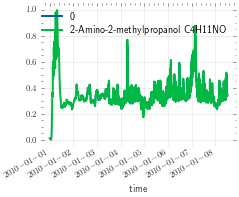

In [6]:
historical_forceasts_0[1].plot()
y[TARGETS_clean[0]].plot()

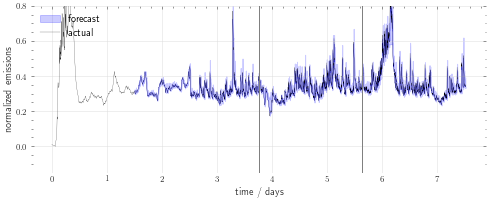

In [7]:
make_forecast_plot(y, historical_forceasts_0[0].pd_dataframe(), historical_forceasts_0[1].pd_dataframe(),  historical_forceasts_0[2].pd_dataframe(), target=0, outname='20220312_trainall_0.pdf')

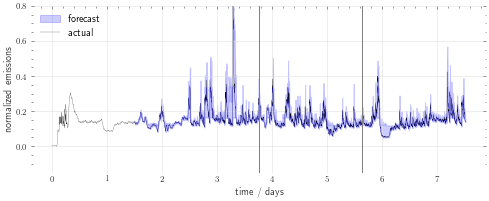

In [8]:
make_forecast_plot(y, historical_forceasts_1[0].pd_dataframe(), historical_forceasts_1[1].pd_dataframe(),  historical_forceasts_1[2].pd_dataframe(), target=1, outname='20220312_trainall_1.pdf')

In [9]:
joblib.dump(gbdt_all_data_0, '20220312_model_all_data_0')
joblib.dump(gbdt_all_data_1, '20220312_model_all_data_1')

['20220312_model_all_data_1']

In [10]:
joblib.dump(y_transformer, '20220312_y_transformer')
joblib.dump(transformer, '20220312_x_transformer')

['20220312_x_transformer']